In [24]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [25]:
image_directory = './data/images'
mask_directory = './data/masks'

In [26]:
image_names = glob.glob("./data/images/*.png")
mask_names = glob.glob("./data/masks/*.png")

In [27]:
image_names.sort()
mask_names.sort()
subset_length = 100
image_names = image_names[:subset_length]
mask_names = mask_names[:subset_length]

In [91]:
def resize_images(images):
    resized_images = []
    for image in images:
        resized = cv2.resize(image,(256,256))
        resized_images.append(resized)
    return resized_images

IMG_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [90]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomCrop(150,150),
  layers.RandomContrast(0.5),
  layers.RandomBrightness(0.3)
])

In [7]:
def display_image(cv2_img,cv2_mask):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(cv2_img, cmap='gray')
    plt.subplot(122)
    plt.imshow(cv2_mask, cmap='gray')
    plt.show()

In [92]:
# resize images
images = [cv2.imread(img, 0) for img in image_names]
# images = resize_images(images)

In [93]:
# resize masks
masks = [cv2.imread(img,0) for img in mask_names]
# masks = resize_images(masks)

In [35]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

In [36]:
image_dataset.shape

(100, 256, 256, 1)

In [62]:
sample_image = tf.cast(image_dataset[0], tf.float32)

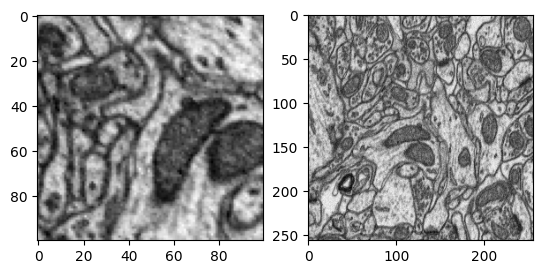

In [63]:
plt.subplot(121)
plt.imshow(data_augmentation(sample_image),cmap='gray')
plt.subplot(122)
plt.imshow(sample_image,cmap='gray')
plt.show()


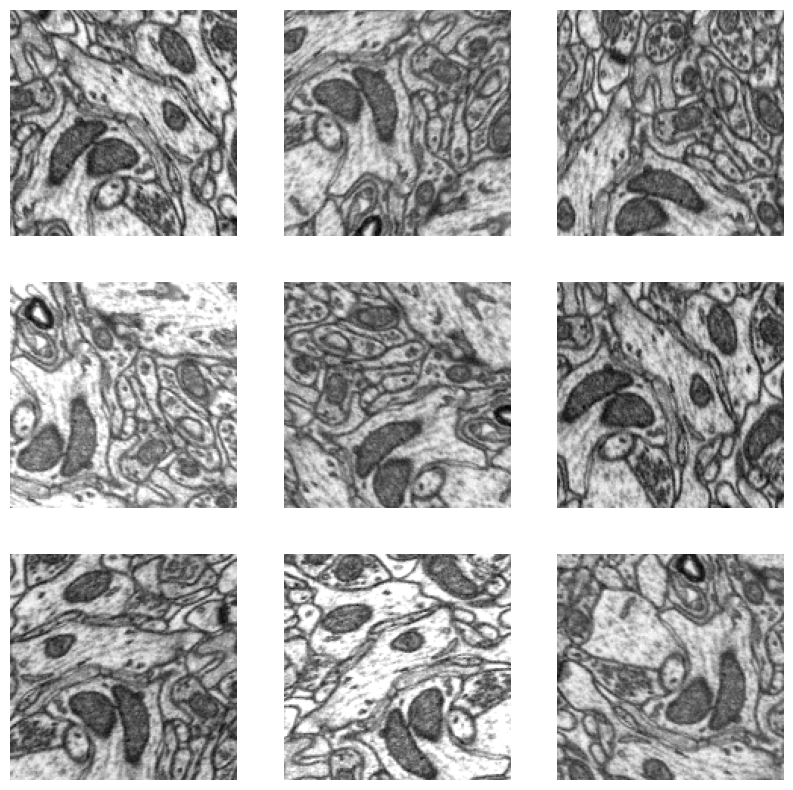

In [94]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(sample_image)
  plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image,cmap='gray')
  plt.axis("off")

In [59]:
type(sample_image)

tensorflow.python.framework.ops.EagerTensor

numpy.ndarray

In [11]:
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset,axis=3)

In [12]:
mask_dataset.shape[0]

100

In [13]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

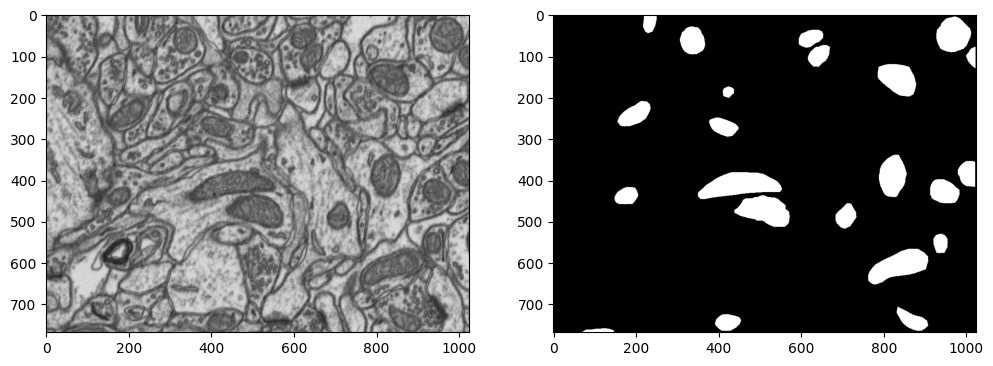

In [15]:
random_index = random.randint(0,image_dataset.shape[0])
random_image = images[random_index]
random_mask = masks[random_index]
display_image(random_image,random_mask)

In [41]:
image_dataset[0].shape

(768, 1024, 1)